In [1]:
from functions_for_all_nutrients import *

In [2]:
username = !whoami
username

['alibow']

In [3]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = [2,3,4,5]
sex_ids = [1,2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]

In [4]:
coverage_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/lsff_input_coverage_data.csv'

In [5]:
location_ids = (list(
                pd.read_csv(coverage_data_dir)
                .location_id
                .unique()))
location_ids

[179, 163, 214, 161, 165, 190, 189, 196]

In [6]:
nutrients = ['vitamin a','zinc','iron','folic acid']
vehicles = ['oil','wheat flour']

In [7]:
l = get_ids('location')
l = l[l['location_id'].isin(location_ids)].filter(['location_id','location_name'])
l

,location_id,location_name
135,161,Bangladesh
137,163,India
139,165,Pakistan
150,179,Ethiopia
160,189,United Republic of Tanzania
161,190,Uganda
166,196,South Africa
183,214,Nigeria


In [8]:
coverage_u5 = pd.DataFrame()
for nutrient in nutrients:
    if nutrient == 'vitamin a':
        vehicle = 'oil'
    else:
        vehicle = 'wheat flour'
    baseline_coverage, counterfactual_coverage = generate_overall_coverage_rates(
                                                     coverage_data_dir,
                                                     nutrient, 
                                                     vehicle,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                    ['under-5','total population',np.nan])
    baseline_coverage['coverage_level'] = 'baseline'
    coverage = pd.concat([baseline_coverage.reset_index(),counterfactual_coverage.reset_index()], ignore_index=True)
    coverage['nutrient'] = nutrient
    coverage['vehicle'] = vehicle
    coverage_u5 = pd.concat([coverage_u5, coverage], ignore_index=True)

coverage_u5

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v107/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,year,nutrient,vehicle
0,baseline,0.421529,0.440459,0.427591,0.433937,0.435490,0.429013,0.442296,0.442175,0.430682,...,0.427380,0.428890,0.426433,0.431283,0.430816,0.410107,161,2021,vitamin a,oil
1,baseline,0.421529,0.440459,0.427591,0.433937,0.435490,0.429013,0.442296,0.442175,0.430682,...,0.427380,0.428890,0.426433,0.431283,0.430816,0.410107,161,2022,vitamin a,oil
2,baseline,0.421529,0.440459,0.427591,0.433937,0.435490,0.429013,0.442296,0.442175,0.430682,...,0.427380,0.428890,0.426433,0.431283,0.430816,0.410107,161,2023,vitamin a,oil
3,baseline,0.421529,0.440459,0.427591,0.433937,0.435490,0.429013,0.442296,0.442175,0.430682,...,0.427380,0.428890,0.426433,0.431283,0.430816,0.410107,161,2024,vitamin a,oil
4,baseline,0.421529,0.440459,0.427591,0.433937,0.435490,0.429013,0.442296,0.442175,0.430682,...,0.427380,0.428890,0.426433,0.431283,0.430816,0.410107,161,2025,vitamin a,oil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.5,0.299438,0.301669,0.305461,0.301593,0.294173,0.297450,0.293479,0.297046,0.303781,...,0.302218,0.303361,0.293725,0.302930,0.303511,0.279849,214,2024,folic acid,wheat flour
636,0.8,0.479101,0.482671,0.488737,0.482549,0.470676,0.475920,0.469566,0.475274,0.486050,...,0.483549,0.485378,0.469960,0.484689,0.485618,0.447758,214,2024,folic acid,wheat flour
637,0.2,0.119775,0.120668,0.122184,0.120637,0.117669,0.118980,0.117391,0.118818,0.121512,...,0.120887,0.121345,0.117490,0.121172,0.121404,0.111940,214,2025,folic acid,wheat flour
638,0.5,0.299438,0.301669,0.305461,0.301593,0.294173,0.297450,0.293479,0.297046,0.303781,...,0.302218,0.303361,0.293725,0.302930,0.303511,0.279849,214,2025,folic acid,wheat flour


In [9]:
coverage_u5_summarized = (coverage_u5
                   .set_index([c for c in coverage_u5.columns if 'draw' not in c])
                   .apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)
                   .filter(['mean','2.5%','97.5%'])
                   .reset_index())
coverage_u5_summarized

,coverage_level,location_id,year,nutrient,vehicle,mean,2.5%,97.5%
0,baseline,161,2021,vitamin a,oil,0.428316,0.414307,0.442562
1,baseline,161,2022,vitamin a,oil,0.428316,0.414307,0.442562
2,baseline,161,2023,vitamin a,oil,0.428316,0.414307,0.442562
3,baseline,161,2024,vitamin a,oil,0.428316,0.414307,0.442562
4,baseline,161,2025,vitamin a,oil,0.428316,0.414307,0.442562
...,...,...,...,...,...,...,...,...
635,0.5,214,2024,folic acid,wheat flour,0.299902,0.288539,0.311874
636,0.8,214,2024,folic acid,wheat flour,0.479844,0.461662,0.498999
637,0.2,214,2025,folic acid,wheat flour,0.119961,0.115416,0.124750
638,0.5,214,2025,folic acid,wheat flour,0.299902,0.288539,0.311874


In [10]:
maximum_coverage = pd.read_csv(coverage_data_dir)
maximum_coverage = (maximum_coverage.loc[maximum_coverage.vehicle.isin(vehicles)]
        .loc[maximum_coverage.value_description == 'percent of population eating industrially produced vehicle']
        .loc[maximum_coverage.sub_population.isin(['under-5','total population',np.nan])])
maximum_coverage.head()

,location_id,location_name,sub_population,vehicle,value_description,nutrient,value_mean,value_025_percentile,value_975_percentile
2,179,Ethiopia,under-5,wheat flour,percent of population eating industrially prod...,na,27.000000,17.000000,37.000000
4,179,Ethiopia,under-5,oil,percent of population eating industrially prod...,na,70.000000,60.000000,80.000000
8,163,India,NaN,oil,percent of population eating industrially prod...,na,89.400000,87.000000,91.800000
9,163,India,NaN,wheat flour,percent of population eating industrially prod...,na,7.100000,5.600000,9.100000
14,214,Nigeria,total population,oil,percent of population eating industrially prod...,na,31.398007,28.334431,34.461583


In [11]:
def make_coverage_bar_charts(data, nutrient, vehicle):
    plt.figure(figsize=(7, 4), dpi=120)
    #plt.figure(fig)
    data = (data
            .loc[data.vehicle==vehicle]
            .loc[data.nutrient.isin(['na',nutrient])]
            .loc[data.year==2025]).sort_values(by='location_id')
    data['mean'] = data['mean'] * 100
    data['2.5%'] = data['2.5%'] * 100
    data['97.5%'] = data['97.5%'] * 100
    base = data.loc[data.coverage_level=='baseline']
    alt_20 = data.loc[data.coverage_level==0.2]
    alt_50 = data.loc[data.coverage_level==0.5]
    alt_80 = data.loc[data.coverage_level==0.8]
    barWidth = 0.20
    a = np.arange(len(base))
    b = [x + barWidth for x in a]
    c = [x + barWidth for x in b]
    d = [x + barWidth for x in c]
    plt.bar(a, base['mean'], width=barWidth, yerr = [base['mean'] - base['2.5%'],base['97.5%'] - base['mean']], 
            label='Baseline Coverage')
    plt.bar(b, alt_20['mean'], width=barWidth, yerr = [alt_20['mean'] - alt_20['2.5%'],alt_20['97.5%'] - alt_20['mean']], 
            color='tab:red', label='20% Coverage')
    plt.bar(c, alt_50['mean'], width=barWidth, yerr = [alt_50['mean'] - alt_50['2.5%'],alt_50['97.5%'] - alt_50['mean']], 
            color='tab:orange', label='50% Coverage')
    plt.bar(d, alt_80['mean'], width=barWidth, yerr = [alt_80['mean'] - alt_80['2.5%'],alt_80['97.5%'] - alt_80['mean']], 
            color='tab:green', label='80% Coverage')

    df = (maximum_coverage
          .loc[maximum_coverage.vehicle==vehicle]
          .sort_values(by='location_id').drop_duplicates())
    for i in list(range(0,len(df.location_id.unique()))):
        if i == 0:
            plt.hlines(df.loc[df.location_id==df.location_id.unique()[i]]['value_mean'], -0.1 + i, 0.7 + i, 
                   linestyle='dashed', color='black', label='Eating industrially produced vehicle')
        else: 
            plt.hlines(df.loc[df.location_id==df.location_id.unique()[i]]['value_mean'], -0.1 + i, 0.7 + i, 
                   linestyle='dashed', color='black')
        plt.fill_between([-0.1 + i, 0.7 + i], [df.loc[df.location_id==df.location_id.unique()[i]]['value_025_percentile'].values[0]] * 2,
                        [df.loc[df.location_id==df.location_id.unique()[i]]['value_975_percentile'].values[0]] * 2,
                        alpha=0.2, color='black')

    plt.legend(bbox_to_anchor=[1.75,1])
    plt.title(f'{nutrient.capitalize()} in {vehicle} fortification coverage')
    plt.ylabel('Percent of population')
    plt.xticks([r + barWidth * 1.5 for r in range(len(df))], l.location_name.values, rotation=90)

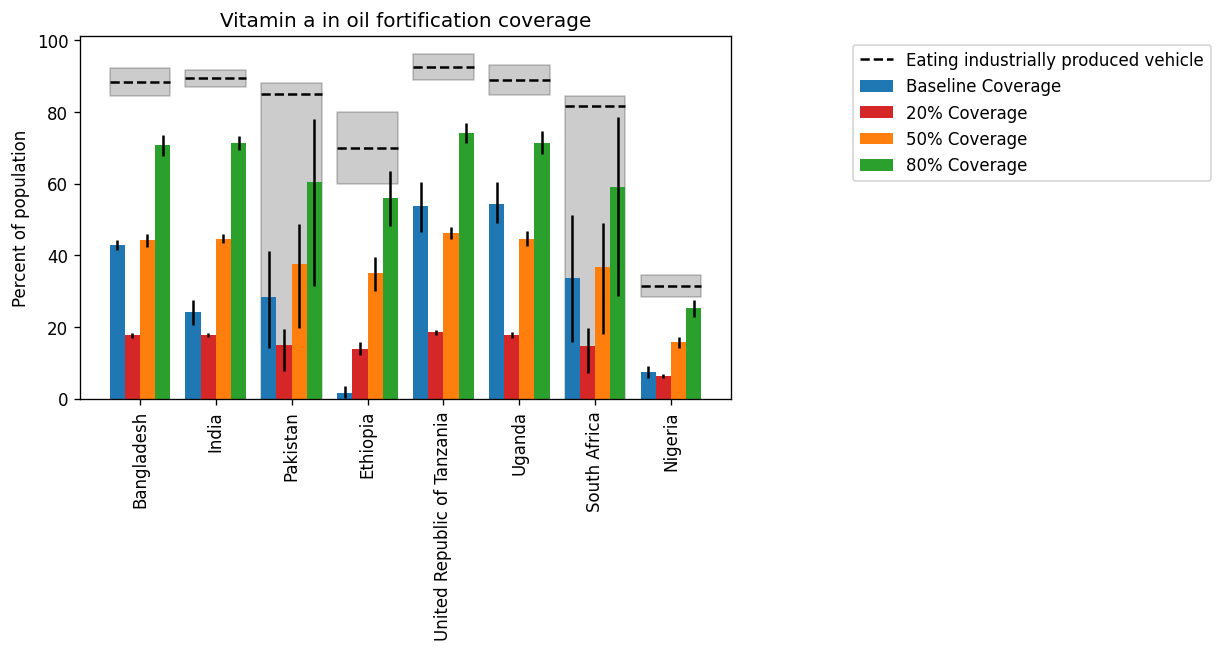

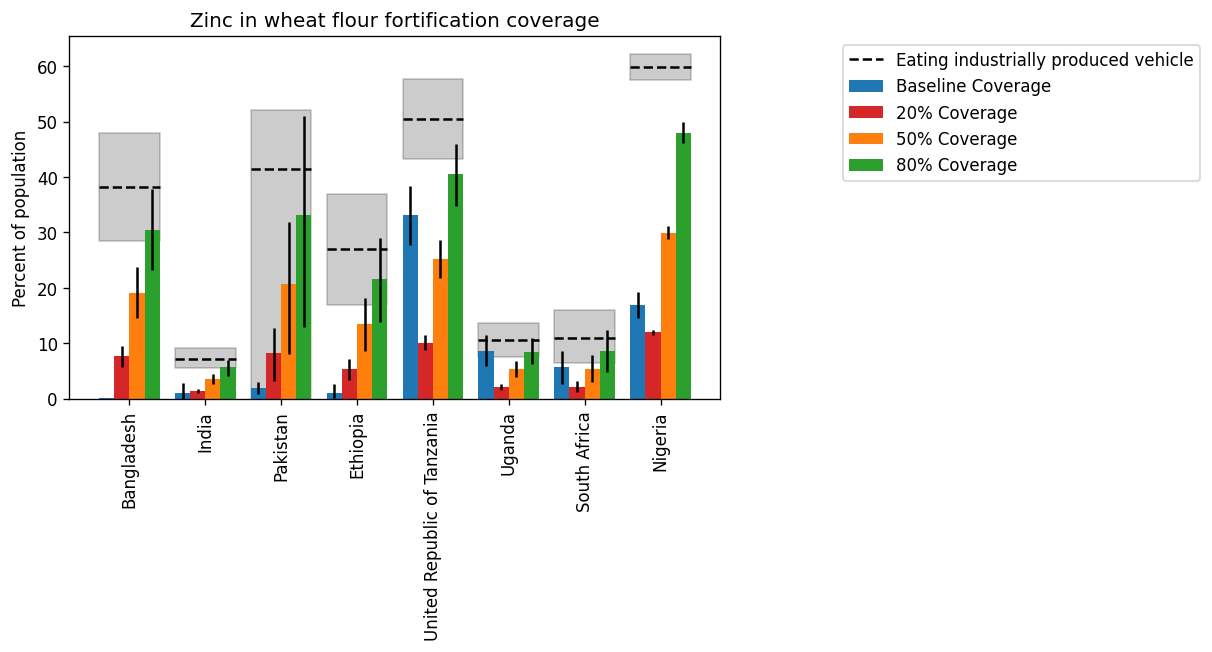

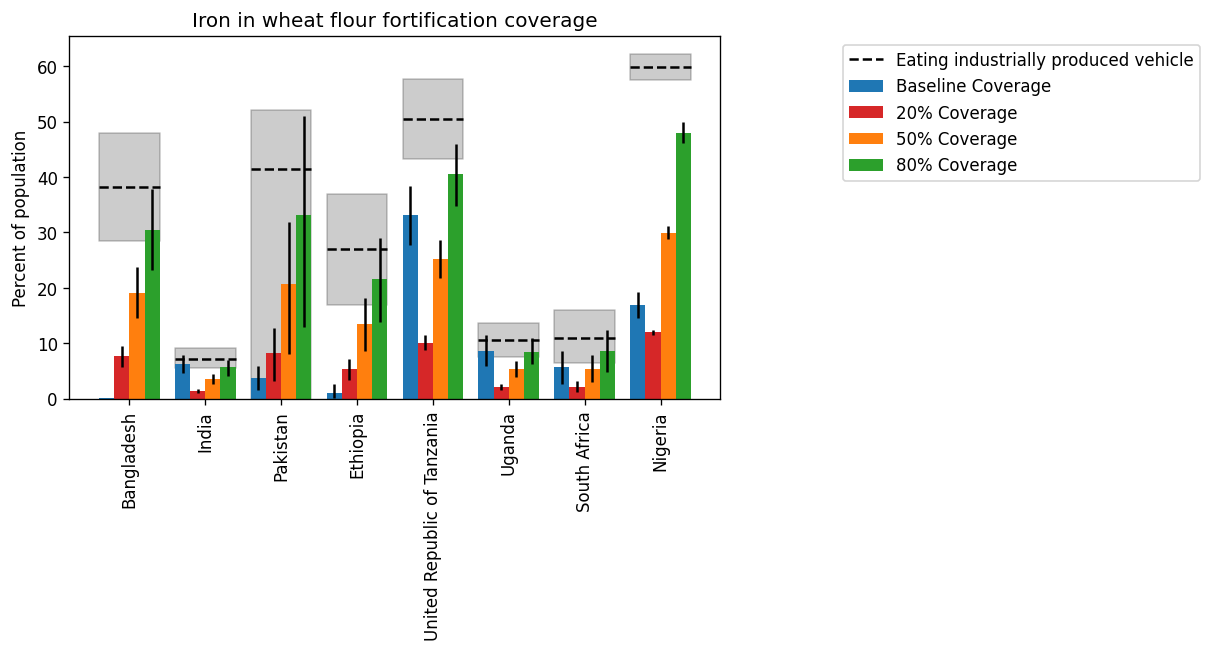

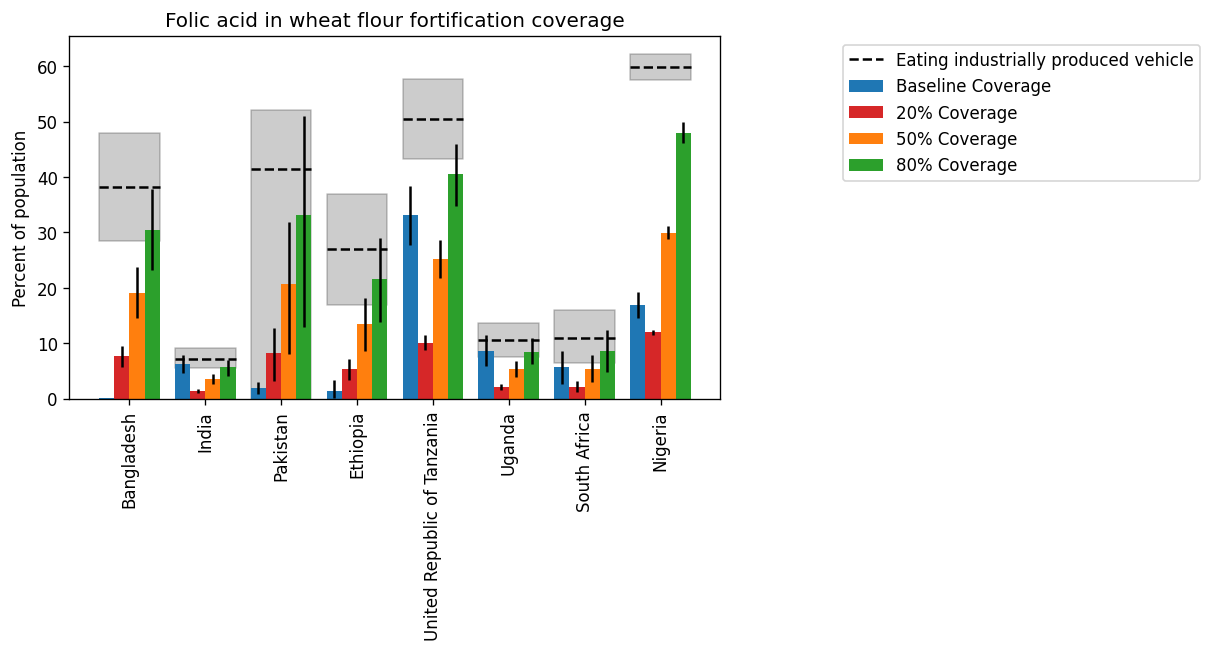

In [13]:
make_coverage_bar_charts(coverage_u5_summarized, 'vitamin a', 'oil')
make_coverage_bar_charts(coverage_u5_summarized, 'zinc', 'wheat flour')
make_coverage_bar_charts(coverage_u5_summarized, 'iron', 'wheat flour')
make_coverage_bar_charts(coverage_u5_summarized, 'folic acid', 'wheat flour')